In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import io
from sklearn.svm import SVC

In [165]:
#plots accuracy, returns None
def plot_accuracy(x, y, name):
    plt.plot(x, y)
    plt.xlabel('num_samples')
    plt.ylabel('accuracy')
    plt.title(name)
    plt.show()

In [166]:
# Purpose: Trains SVM
# Params:
# Return: list of valid_errors from each experiment
# def train_svm(samples, clf, train_set, train_y, valid_set, valid_y, name):
#     train_error = list()
#     valid_error = list()
#     for sample_size in samples:
#         # TODO: check that labels is a one dimensional array before calling fit
#         print("sample_size: " + str(sample_size))
#         clf.fit(train_set[:sample_size], train_y[:sample_size])
#         train_error.append(clf.score(train_set, train_y))
#         print("train_error: " + str(train_error))
#         valid_error.append(clf.score(valid_set, valid_y))
#         print("valid_error: " + str(valid_error))
#     plot_accuracy(samples, train_error, name + ' Training_Accuracy')
#     plot_accuracy(samples, valid_error, name + ' Validation_Accuracy')
#     return valid_error

In [167]:
# Purpose: Trains SVM
# Params:
# Return: list of valid_errors from each experiment
def train_svm(samples, clf, train_set, train_y, valid_set, valid_y, name):
    valid_error, train_error = train_svm_no_plot(samples, clf, train_set, train_y, valid_set, valid_y, name)
    plot_accuracy(samples, train_error, name + ' Training_Accuracy')
    plot_accuracy(samples, valid_error, name + ' Validation_Accuracy')
    return valid_error, train_error

In [168]:
# Purpose: Trains SVM
# Params:
# Return: list of valid_errors from each experiment
#REMEMBER TO UPDATE THE RETURN VALID_ERROR, TRAIN_ERROR, need to do train_svm[0] to get valid_error
def train_svm_no_plot(samples, clf, train_set, train_y, valid_set, valid_y, name):
    train_error = list()
    valid_error = list()
    for sample_size in samples:
        # TODO: check that labels is a one dimensional array before calling fit
        print("Sample_size: " + str(sample_size))
        clf.fit(train_set[:sample_size], train_y[:sample_size])
        train_score = clf.score(train_set, train_y)
        train_error.append(train_score)
        print("train_score: " + str(train_score))
        valid_score = clf.score(valid_set, valid_y)
        valid_error.append(valid_score)
        print("valid_score: " + str(valid_score))
    return valid_error, train_error

In [169]:
# returns dictionary with variable names as keys and matrix as values
mnist_dict = io.loadmat('mnist/train.mat')

In [170]:
#Splits data set into training and validation set of given size
#SHould this return a 2-d numpy array for labels? or keep it at one? clf requires 1-d, but concatenate requires 2.
def split_train_and_valid_sets(data, size):
    np.random.shuffle(data)
    shape = data.shape[0] 
    valid_set = data[:size, :-1] 
    valid_y = data[:size, -1] 
    train_set = data[size:, :-1] 
    train_y = data[size:, -1]
    return shape, valid_set, valid_y, train_set, train_y

In [171]:
# ***********************PROBLEM 1 --> VALIDATION SETS***********************
# -----------MNIST SET--------
# # get the matrix
# mnist_trainX = mnist_dict['trainX']
# np.random.shuffle(mnist_trainX)
# num_points_mnist = mnist_trainX.shape[0] 
# mnist_valid_set = mnist_trainX[:10000, :-1] 
# mnist_valid_y = mnist_trainX[:10000, -1] 
# mnist_train_set = mnist_trainX[10000:, :-1] 
# mnist_train_y = mnist_trainX[10000:, -1]

In [172]:
# -----------MNIST SET--------
mnist_trainX = mnist_dict['trainX']
shape, mnist_valid_set, mnist_valid_y, mnist_train_set, mnist_train_y = split_train_and_valid_sets(mnist_trainX, 10000)

In [173]:
# ---------------CIFAR-10 SET----------------
# cifar_dict = sp.io.loadmat('cifar/train.mat')
# cifar_trainX = cifar_dict['trainX']
# np.random.shuffle(cifar_trainX)
# cifar_valid_set = cifar_trainX[:5000, :-1] 
# cifar_valid_y = cifar_trainX[:5000, -1] 
# cifar_train_set = cifar_trainX[5000:, :-1] 
# cifar_train_y = cifar_trainX[5000:, -1]

In [ ]:
# ---------------CIFAR-10 SET----------------
cifar_dict = sp.io.loadmat('cifar/train.mat')
cifar_trainX = cifar_dict['trainX']
cifar_shape, cifar_valid_set, cifar_valid_y, cifar_train_set, cifar_train_y = split_train_and_valid_sets(cifar_trainX, 5000)

In [8]:
# --------------SPAM DataSet----------------
# spam_dict = sp.io.loadmat('spam/spam_data.mat')
# spam_trainX = spam_dict['training_data']
# np.random.shuffle(spam_trainX)
# spam_valid_set = spam_trainX[:1034, :-1] 
# spam_valid_y = spam_trainX[:1034, -1] 
# spam_train_set = spam_trainX[1034:, :-1] 
# spam_train_y = spam_trainX[1034:, -1]

In [174]:
# --------------SPAM DataSet----------------
spam_dict = sp.io.loadmat('spam/spam_data.mat')
data_set= spam_dict['training_data']
data_labels = spam_dict['training_labels']
print(data_set.shape, data_labels.T.shape)
merged_data_and_labels = np.hstack((data_set, data_labels.T))
np.random.shuffle(merged_data_and_labels)
spam_shape, spam_valid_set, spam_valid_y, spam_train_set, spam_train_y = split_train_and_valid_sets(merged_data_and_labels, 1034)
print(spam_train_y.shape)

(5172, 32) (5172, 1)
(4138,)


In [ ]:
# *********************PROBLEM 2 --> TRAIN DATA ***********************

# ----------TRAIN MNIST DATA------------#
print("Training MNIST")
clf_mnist = SVC()
experiments = [100, 200, 500, 1000, 2000, 5000, 10000]
# expect between 70-90% accuracy
valid_error, train_error = train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y,
          'MNIST')
# print('Valid_error is: ' + str(valid_error))
# print('Train_error is: ' + str(train_error))

Training MNIST
sample_size: 100


train_error: [0.099400000000000002]


valid_error: [0.095799999999999996]
sample_size: 200


train_error: [0.099400000000000002, 0.10116]


valid_error: [0.095799999999999996, 0.095799999999999996]
sample_size: 500


train_error: [0.099400000000000002, 0.10116, 0.10702]


valid_error: [0.095799999999999996, 0.095799999999999996, 0.1002]
sample_size: 1000


train_error: [0.099400000000000002, 0.10116, 0.10702, 0.13064000000000001]


valid_error: [0.095799999999999996, 0.095799999999999996, 0.1002, 0.10929999999999999]
sample_size: 2000


train_error: [0.099400000000000002, 0.10116, 0.10702, 0.13064000000000001, 0.14832000000000001]


valid_error: [0.095799999999999996, 0.095799999999999996, 0.1002, 0.10929999999999999, 0.10929999999999999]
sample_size: 5000


In [ ]:
# -----------TRAIN CIFAR DATA-----------#
print("Training CIFAR")
clf_cifar = SVC(kernel='linear')
experiments = [100, 200, 500, 1000, 2000, 5000]
# expect between 25-35% accuracy
valid_error, train_error = train_svm(experiments, clf_cifar, cifar_train_set, cifar_train_y, cifar_valid_set, cifar_valid_y, 'CIFAR')
print('Valid_error is ' + str(valid_error))
print('Train_error is: ' + str(train_error))

Training SPAM



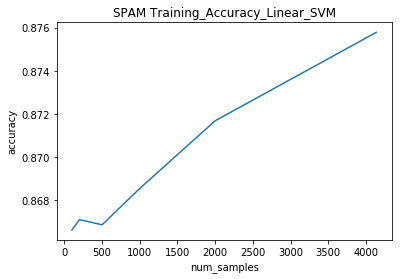

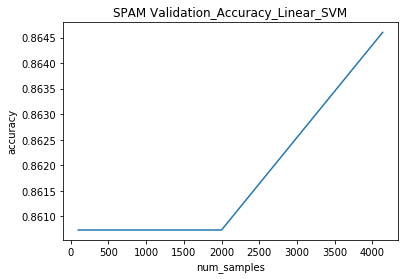

In [10]:
# ----------TRAIN SPAM DATA -------------
print("Training SPAM")
clf_spam = SVC()
experiments = [100, 200, 500, 1000, 2000, 4137]
# expect between 70-90% accuracy
valid_error, train_error = train_svm(experiments, clf_spam, spam_train_set, spam_train_y, spam_valid_set, spam_valid_y, 'SPAM')
print('Valid_error is: ' + str(valid_error))
print('Train_error is: ' + str(train_error))

In [ ]:
# ************************** PROBLEM 3: BEST C Value ********************************
from sklearn.svm import SVC
C_range = np.logspace(-5, 1, num=4)
experiments = [10000]
for C in C_range:
    clf_mnist = SVC(C=C)
    train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y, 'MNIST)')

In [154]:
# ************************** PROBLEM 4: K-FOLD ********************************
def k_fold_split(data, clf, k, name):
    np.random.shuffle(data)
    valid_errors = list()
    copy_data = data[:, :]
    for i in range(k):
        if is_divisible_by_k(copy_data, k):
            k_arrays = np.split(copy_data, k)
        else:
            divisible_data, extra_data = preprocess_data(copy_data, k)
            k_arrays = np.split(divisible_data, k)
            print("last split shape: " + str(k_arrays[-1].shape))
            print("extra_data shape: " + str(extra_data.shape))
            np.vstack((k_arrays[-1], extra_data)) 
        valid_set = k_arrays.pop(i)
        print("valid_set shape is: " + str(valid_set.shape))
        valid_data = valid_set[:, :-1]
        print("valid_data shape is: " + str(valid_data.shape))
        valid_y = valid_set[:, -1]
        print("valid_y shape is: " + str(valid_y.shape))
        print('num lists to concatenate ' + str(len(k_arrays)))
        train_set = np.vstack(k_arrays)
        print("train_set shape is: " + str(train_set.shape))
        train_data = train_set[:, :-1]
        print("train_data shape is: " + str(train_data.shape))
        train_y = train_set[:, -1]
        print("train_y shape is: " + str(train_y.shape))
        valid_errors.append(train_svm_no_plot([train_data.shape[0]], clf, train_data, train_y, valid_data, valid_y, name)[0])
    valid_score = [sum(score[0])/k for score in valid_errors]
    print("Valid Score is:")
    print(valid_score)
    return valid_score

In [155]:
def preprocess_data(data, k):
    print('og data shape: ' + str(data.shape))
    remainder = data.shape[0] % k
    extra_samples = data[-remainder:, :]
    print("extra_samples " + str(extra_samples.shape))
    # two_dim_extras = np.array([extra_samples])
    # transposed_extras = two_dim_extras.T
    # print('np array extras: ' + str(two_dim_extras.shape))
    divisible_samples = data[:-remainder, :]
    print('divisible_samples: ' + str(divisible_samples.shape))
    return divisible_samples, extra_samples

In [156]:
def is_divisible_by_k(data, k):
    if data.shape[0] % k == 0:
        return True
    return False

training set data: (4138, 32)
transposed_labels (4138, 1)
spam_concatenated: (4138, 33)
og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
sample_size: 3308


train_error: [0.83101571946795649]
valid_error: [0.78597339782345832]


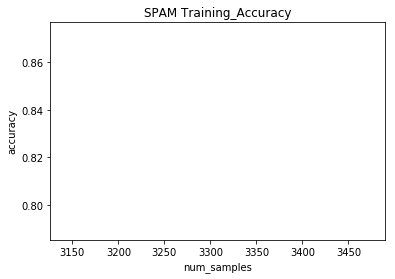

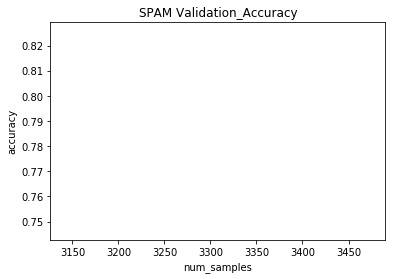

og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
sample_size: 3308


train_error: [0.82617896009673519]
valid_error: [0.79927448609431684]


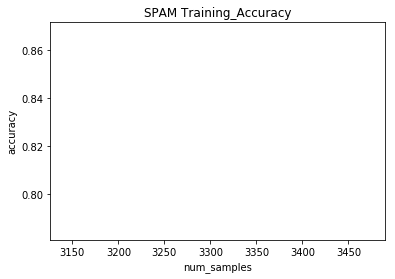

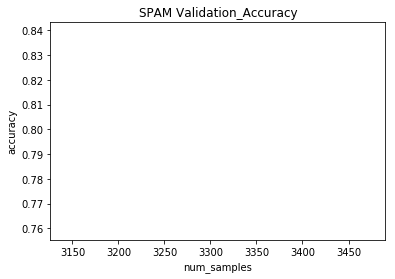

og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
sample_size: 3308


train_error: [0.82436517533252718]
valid_error: [0.80773881499395406]


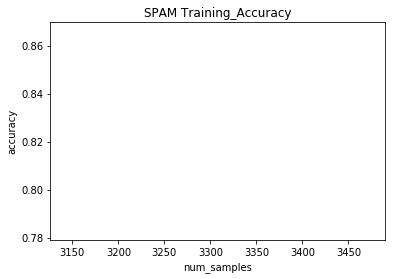

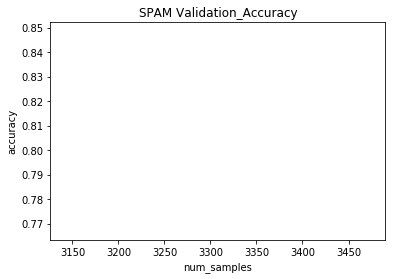

og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
sample_size: 3308


train_error: [0.82164449818621521]
valid_error: [0.8295042321644498]


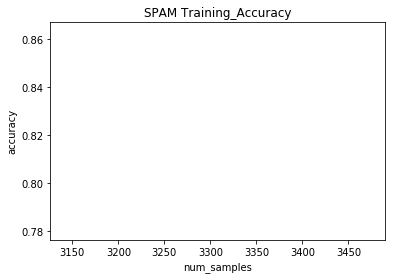

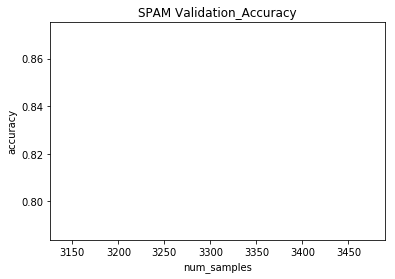

og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
sample_size: 3308


train_error: [0.82224909310761785]
valid_error: [0.81741233373639666]


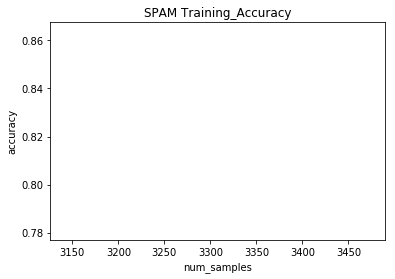

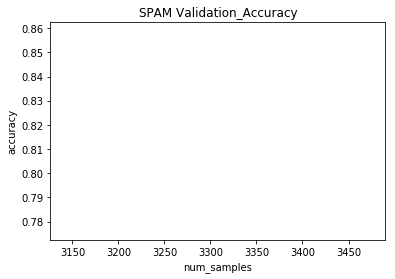

TypeError: 'numpy.float64' object is not iterable

In [158]:
print("Running KFOLD")
clf_spam = SVC()
# both arrays need to be 2-dimensional
two_dim_label = np.array([spam_train_y])
transposed_labels = two_dim_label.T
print('training set data: ' + str(spam_train_set.shape))
print('transposed_labels ' + str(transposed_labels.shape))
spam_training = np.hstack((spam_train_set, transposed_labels))
print('spam_concatenated: ' + str(spam_training.shape))
k_fold_split(spam_training, clf_spam, 5, 'SPAM')

In [ ]:
# ****************** PROBLEM 5: KAGGLE COMPETITION ***************
# from sklearn import svm
# #create four classifers
# #in the constructor for the svc you need to make sure it's a binary classifier
# clf1 = svm.SVC()
# clf2 = svm.SVC()
# clf3 = svm.SVC()
# clf4 = svm.SVC()
# 
# #add extra models to increase the hamming distance, get more room for errors
# 
# #fit the data X to the labels yi where yi = {0,1}
# #binary classifer
# #this comes after you build y1, y2, y3, y4
# clf1.fit(X, y1)
# clf2.fit(X, y2)
# clf3.fit(X, y3)
# clf4.fit(X, y4)
#